# Project: Investigating a Dataset of "No Show Appointment."

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This is a project that will be analysing the dataset that collects information from 100k medical appointments in Brazil. It is focused on whether or not patients show up for their appointment or not. The dataset contains some characteristics of patients that will help us answer the following questions:

1. What are the factors that are likely to influence a patient showing up for their appointment or not?
2. What do we recommend the hospital does differently to reduce the likelyhood of patients not showing up for their appointments?


The dataset has over 100 enteries and 14 features. Here's a brief summary of the characteristics of each column:
- Appointment ID: a unique identifier of each patient.
- Gender: To distinguish if a patient is 'male' or 'female'.
- Scheduled Day: This signifies the day the patient set up their appointment.
- Appointment Day: This is the actual date of the patient's appointment.
- Age: The age of the patient.
- Neighbourhood: This indicates the location of the hospital.
- Scholarship: This indicates whether or not a patient is enrolled in Brasillian welfare program.
- Sms_received: This is an indication of whether a patient recieved sms notification about their appointment or not.
- No_show: This column indicates whether or not a patient showed up for their appoiontment. **In this dataset, 'No' means that the patient actually showed up for their appointment and 'Yes' means that they didn't.**


In [1]:
#import modules to be used for the analysis

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

We've successfully imported all the modules to be used for this analysis. The next thing would be to import the dataset that we'll be working with.

In [2]:
#import dataset

df = pd.read_csv('no_show_appointments.csv')

In [3]:
#confirm dataset loaded correctly

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#how many rows and columns are we working with?

df.shape

(110527, 14)

In [5]:
#find out if there are missing values and the datatypes for each feature

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Check for duplicates
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

### General Properties

From the dataset we can see that we're going to be working with **110527** rows of data and **14** columns. Going by the data information, we can confirm that there are no missing values.

### Data Cleaning 

From the information about the dataset, it is clear that we have no missing values and there are also no duplicate data. However, there are some typographical errors in the column names and the format is not also uniform. The next thing to do is to clean up the column names, put them in uniform form and correct the spellings.

In [7]:
#rename column names to uniform format and correct typos

df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'showed_up']

#confirm changes
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Notice that on the no_show column, we have two unique values within the column. Let's confirm below:

In [8]:
df.showed_up.unique()

array(['No', 'Yes'], dtype=object)

Remember that the dataset said that **In this dataset, 'No' means that the patient actually showed up for their appointment and 'Yes' means that they didn't.** I think this is a bit confusing and it would be easier to follow along if we set **NO** = *didn't show up for appointment* and **Yes** = *showed up for appointment*. On that note, we can replace No with Yes and Yes with No.

In [9]:
#replace 'No' with 'Yes'

df = df.replace(to_replace=["No", "Yes"], value=["Yes", "No"])


In [10]:
#confirm change
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


The data now looks clean and ready for analysis.

<a id='eda'></a>
## Exploratory Data Analysis

The next step is to carry out an exploratory data analysis to answer the resear questions which are:

- What are the factors that are likely to influence a patient showing up for their appointment or not?
- What do we recommend the hospital does differently to reduce the likelyhood of patients not showing up for their appointments?
- Which neighbourhood has the most no show appointment?

We will start with the first question:
### What are the factors that are likely to influence a patient showing up for their appointment or not?

In [11]:
#look at the statistical description of the dataset.

df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The above statistical description doesn't really say much in terms of answering the question of the factors that most likely influence appointment behaviours. However, we can group the dataset in a way for us to see it from the appointment perspective.

In [12]:
#Groupby no_show feature to look at the statistics description of the two categories of patients.

df.groupby('showed_up').mean()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
showed_up,,,,,,,,,
No,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
Yes,1.476845e+14,5.681137e+06,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334


Remember that **Yes** now indicates patients that didn't show up for appointment and **No** indicates patients that showed up for their appointment. From this we can see that pateints who showed up for their appointment had a lower rate of sms_received compared to those who didn't show up. However, they also had a higher rate of medical conditions and perhaps that is why they were more inclined to showing up for their appointment. There's also not a lot of age difference between the two category of patients. But let's still visualize the age distribution.

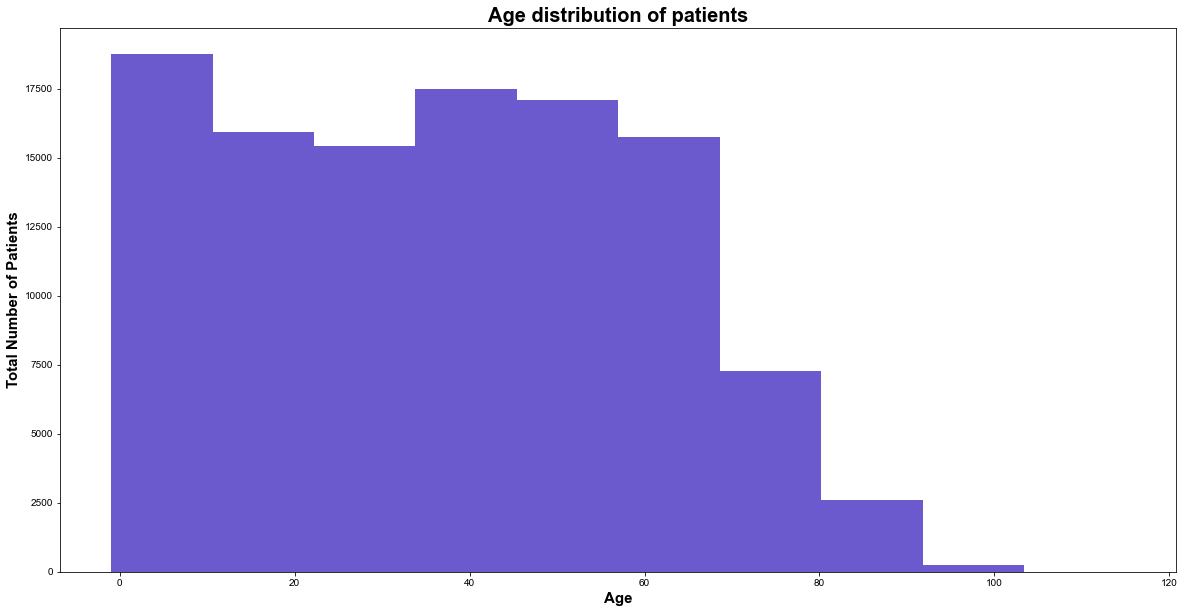

In [13]:
#plot a histogram to show the age distribution of patients
df.hist('age', grid=False, figsize=(20,10), color = 'slateblue')

#label the graph
plt.xlabel('Age', fontweight='bold', fontsize=15)
plt.ylabel('Total Number of Patients', fontweight='bold', fontsize=15)
plt.title('Age distribution of patients', fontweight='bold', fontsize=20);

#changing background colour of the graph.
sns.set_style("darkgrid")

Text(0.04, 0.5, 'Number of Patients')

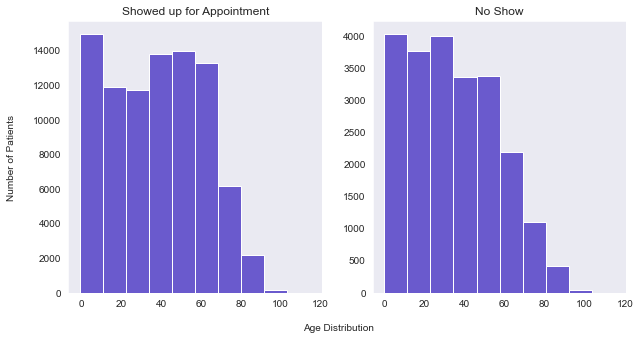

In [14]:
fig, axes = plt.subplots(1, 2)

df.age[df.showed_up == "Yes"].hist(label='showed up', ax = axes[0], figsize=(10,5), color = 'slateblue', grid=False)
df.age[df.showed_up == "No"].hist(label='did not show up', ax = axes[1], figsize=(10,5), color = 'slateblue', grid=False)

axes[0].set_title('Showed up for Appointment')
axes[1].set_title('No Show');

fig.text(0.5, 0.02, 'Age Distribution', ha='center');
fig.text(0.04, 0.5, 'Number of Patients', va='center', rotation='vertical')

#first histogram shows the age distribution of patients who didn't show up for thier appointment and the 
#second histogram shows the age distribution of patients who showed up for thier appointment.

From the above analysis of the age distribution, it seems like patient within the age bracket of 40-70, that is older persons, showed up for their appointment more than patients within the age bracket of 20-30. Both histogram are skwed to the right.

But this doesn't really say much about age being a factor of influence. Therefore, we will analyze another feature which would be the effect of sms notification. But first, let's visualize patients that showed up versus those that didn't, just to give us a sense of the entire population's status.

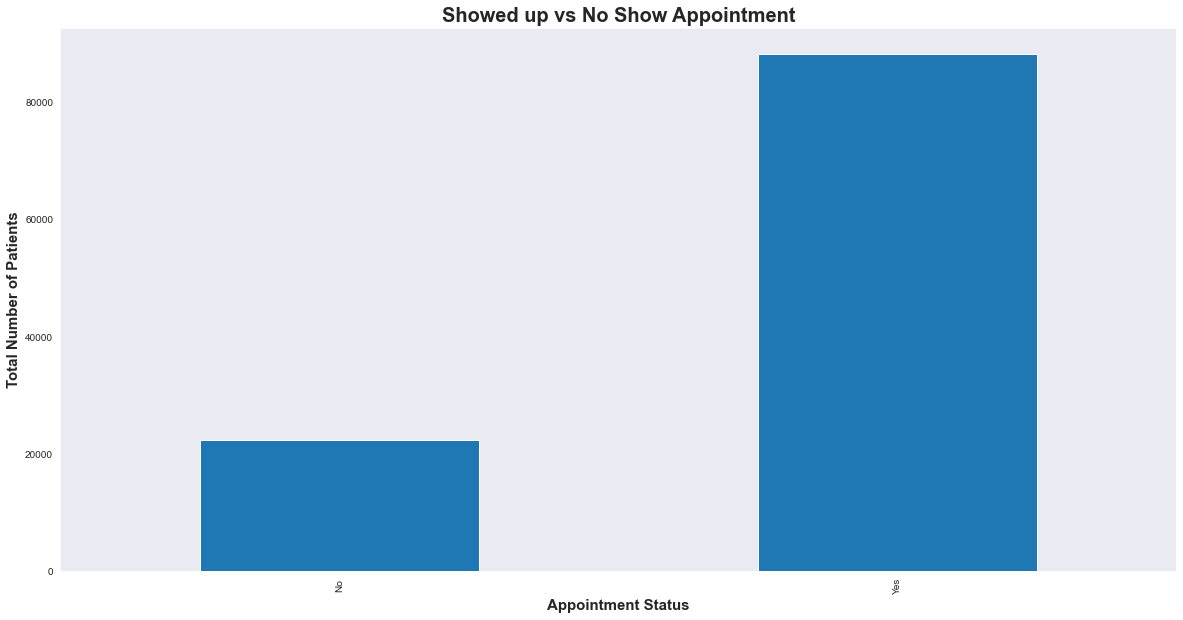

In [15]:
#plot a graph representing people that showed up versus people that didn't show up
df.groupby('showed_up').showed_up.count().plot(kind = 'bar', grid=False, figsize=(20,10));

#label the graph
plt.xlabel('Appointment Status', fontweight='bold', fontsize=15)
plt.ylabel('Total Number of Patients', fontweight='bold', fontsize=15)
plt.title('Showed up vs No Show Appointment', fontweight='bold', fontsize=20)
plt.show();

In [16]:
#numerical representation of people that showed up versus people that didn't show up

#creating a no_show dataframe
no_show = df.query('showed_up == "No"')

#creating a no_show dataframe
yes_show = df.query('showed_up == "Yes"')

In [17]:
no_show.showed_up.count(), yes_show.showed_up.count() #didn't show up for appointment vs showed up for appointment.

(22319, 88208)

We can see from the about that out of 110527 patients, 20% of them didn't show up for their appointment. 

Let's now analyze the sms notification and if it had any influence on the appointment status.

In [18]:
#how many patients received sms
df.sms_received.sum()

35482

So out of 110527 patients, only about 32% of them received sms. Now let's look at it from the angle of the appointment status.

In [19]:
no_show.sms_received.sum(), yes_show.sms_received.sum()

(9784, 25698)

We can see that out of the 35,482 patients that received sms, only **9,784** which is only about 8% of the total number of patients, compared to those that showed up for their appointment. **25,698** patients recieved sms and showed up for their appointment. And that is about 23% of the total popultion.

This confirms that sms notification has an influence on whether a patient shows up for an appointment or not.

Let's look at another factor which is the days the patients scheduled their appoiontment and the actual appointment date, does it have any influence on their appointment status?


In [20]:
#let's see if the scheduled date has anything to do with if people show up for their appointment or not.
#But first let's convert the datatype to datetime datatype

df['scheduled_day'] = pd.to_datetime(df['scheduled_day'], dayfirst=True)
df['appointment_day'] = pd.to_datetime(df['appointment_day'], dayfirst=True)

In [21]:
#confirm change of datatype
df.dtypes

patient_id                     float64
appointment_id                   int64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
handicap                         int64
sms_received                     int64
showed_up                       object
dtype: object

In [22]:
#the number of days between scheduled day and appointment date. Create no column for the output
df['date_difference'] = df['appointment_day'] - df['scheduled_day']

In [23]:
#confirm change in the dataframe
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up,date_difference
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,-1 days +07:52:37


In [24]:
#Move last Column to make it stay beside the appointment_day column
new_cols = ["patient_id","appointment_id","gender","scheduled_day","appointment_day","date_difference","age","neighbourhood","scholarship","hypertension","diabetes","alcoholism","handicap","sms_received","showed_up"]
df=df[new_cols]
df.head() #confirm change of position

,patient_id,appointment_id,gender,scheduled_day,appointment_day,date_difference,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,-1 days +05:21:52,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,-1 days +07:51:33,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,-1 days +07:40:56,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,-1 days +06:30:29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,-1 days +07:52:37,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [25]:
#group the dataset by the appointment date and show the average difference between the scheduled_day and appointment_day
df.groupby('showed_up').date_difference.mean()

showed_up
No    15 days 08:17:34.998879878
Yes    8 days 06:56:46.224594141
Name: date_difference, dtype: timedelta64[ns]

Another factor to consider is the health benefit for patient. Does the enrolment in the Brasillian welfare program have any influnce on the appointment status?

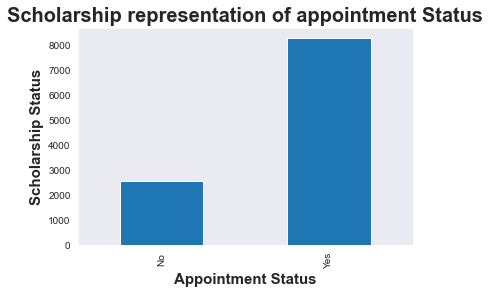

In [26]:
df.groupby('showed_up').scholarship.sum().plot(kind='bar', grid=False) 

#label the graph
plt.xlabel('Appointment Status', fontweight='bold', fontsize=15)
plt.ylabel('Scholarship Status', fontweight='bold', fontsize=15)
plt.title('Scholarship representation of appointment Status', fontweight='bold', fontsize=20)
plt.show();

In [27]:
no_show.scholarship.sum(), yes_show.scholarship.sum() #didn't show up for appointment vs showed up for appointment

(2578, 8283)

***We can see that out of 110527 patients, only 10,861 were enrolled in the healthcare program and from the above analysis, we can see that people who were enroled in the healthcare program showed up for their appointment more than those who weren't***

We can see here that those who showed up for their appointment had relatively shorter difference between their scheduled date and appointment date compared to those who didn't show up.

To answer our first question, from the analysis we can see that two things clearly influence the appointment status of patients:

1. **Sms Notification**: We saw that a larger percentage of patients who showed up for their appointment received sms notification.
2. **Setting Appointment Day**: Patients that had shorter days between the day they scheduled their appointment and the actual appointment date, had a high tendency of showing up for their appointment. This may be due to the fact that you're most likely going to remember an appointment that'll be happening within the next week as opposed to an appointment scheduled for the next two weeks or more.
3. **Enrolment in the Brasillian Welfare Program**: Awareness should be created around the Brasillian Welfare Program, this will encourage more patients to enrol in the program, hence reducing the number of people who don't show up for their hospital appointment.

### What do we recommend the hospital does differently to reduce the likelyhood of patients not showing up for their appointments?

From this analysis, we can recommend the following for the hospital to reduce the likelyhood of patients not showing up:
1. Patients can be encouraged to fix their appointment date within a week from the date they're scheduling the appointment.
2. Hospitals should invest more on sending out sms notification to patients preferrable a few days to their appointment date. This will serve as a reminder to the patients.
3. Initiatives and awareness should be created around getting patients to enrol in the Brasillian Welfare Program.

<a id='conclusions'></a>
## Conclusions

#### Results
We started working with 110527 dataset which had 14 features containing characteristics of patients from hospitals in Brazil. The purpose was to analyze to see the factors that can be used to predict if a patient will show up for their appointment or not. 

We could see that a large percentage of patients showed up for their appointment, however, factors like appointment date, sms notification and enrolment in the Brassillian Welfare Program had a bit of influence on the appointment status of patients. Therefore, to predict if a patient will show up for their appointment or not, these factors can be considered.

#### Limitations

The dataset provided allowed room for some analysis of which we were able to draw some conclusions from and also give recommendations. However, there were some limitations to it.
- The variables to some of the features in the dataset were mostly categorical (hypertension, handicap, diabetes, etc), i.e. either a 1 or 0, hence there was limited room for correlations.
- Perhaps if there was data showing the patients home address, we would have gotten more insight as to whether or not distance was a factor to why patients didn't show up for their appointments. Otherwise, the neighbourhood data didn't really say much in terms of why pateints didn't show up.